In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import math
import matplotlib as mpl
#mpl.use('pdf')
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
import matplotlib
import seaborn as sns
import scipy

#Red
red1= sns.color_palette("Reds_d",1)
red2= sns.color_palette("Reds_d",2)
red3= sns.color_palette("Reds_d",3)
red4= sns.color_palette("Reds_d",4)
red5= sns.color_palette("Reds_d",5)
red6= sns.color_palette("Reds_d",6)
red7= sns.color_palette("Reds_d",7)
red8= sns.color_palette("Reds_d",8)

#YellowGreen
yg1= sns.color_palette("YlGn_d",1)
yg2= sns.color_palette("YlGn_d",2)
yg3= sns.color_palette("YlGn_d",3)
yg4= sns.color_palette("YlGn_d",4)
yg5= sns.color_palette("YlGn_d",5)
yg7= sns.color_palette("YlGn_d",7)

#GreenBlue
gb1= sns.color_palette("GnBu_d",1)
gb2= sns.color_palette("GnBu_d",2)
gb3= sns.color_palette("GnBu_d",3)
gb4= sns.color_palette("GnBu_d",4)
gb5= sns.color_palette("GnBu_d",5)
gb6= sns.color_palette("GnBu_d",6)
gb7= sns.color_palette("GnBu_d",7)
gb8= sns.color_palette("GnBu_d",8)

cp2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],gb7[4]]))
cp2v1 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],yg7[0]]))
cp3 = list(map(lambda x: sns.desaturate(x,0.9),[yg7[0],gb7[4],red7[2]]))
cp4 = list(map(lambda x: sns.desaturate(x,0.9),[yg7[0],red7[2], yg7[5],gb7[4]]))
cp2_2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[0],red7[3],yg7[1],gb7[4]]))
cp2_1 = list(map(lambda x: sns.desaturate(x,0.9),[red7[0],red7[3],gb7[4]]))
cp3_2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[5],red7[0],red7[3],yg7[1],gb7[4]]))
cp6 = list(map(lambda x: sns.desaturate(x,0.9),[red7[5],red7[0],yg7[1],yg7[4],gb7[3],gb7[6]]))
cp7 = list(map(lambda x: sns.desaturate(x,0.9),[red7[5], red7[2],red7[0],yg7[1],yg7[4],gb7[3],gb7[6]]))
cp_total_spectrum = list(map(lambda x: sns.desaturate(x,0.9),gb7 + yg7 + red7))

In [2]:
#sns.set_palette(cp2_1) #BLASX, XKBLAS, PARALiA autotune
#sns.set_palette(cp4)
#sns.set_palette(cp7) #cuBLASXt, BLASX, XKBLAS, PARALiA software, PARALiA autotune
#sns.set_palette(cp2_2) #BLASX, XKBLAS, PARALiA software, PARALiA autotune
sns.color_palette() 

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [4]:


def PARALia_log_read(filename):
    temp = pd.read_csv(filename, header=None, names = ['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
                                                    'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc', 'timer', 'pred_t', 'pred_J'], 
                                                     dtype = {'M': np.int64, 'N': np.int64, 'K': np.int64, 'timer': np.float64, 'pred_t': np.float64, 'pred_J': np.float64} )
    temp.sort_values(by=['M','N','K'])
    return temp

def keep_dev_num(num, dataframe):
    return dataframe[dataframe['dev_num'] == num]

machine = 'karol'
homedir = '~/mount_karol/'
devices = 8
#Mmax = ?
#MemMax = 28*(1024*1024*1024) # Questionable limit
Rmax_Gflops = 15*1024*devices
dev_W_avg = 400

dataset = pd.DataFrame()
ctr = 0 

ctr += 1 ################
scenario_name="cuBLASXt-malloc"
version="2.99"
cuBLASXt_malloc = (PARALia_log_read('%s/cuBLASXtDgemmRunner_predefined_vals_%s.log' 
    %(homedir + 'PhD_Research/PARALiA-GEMMex-malloc-bench/karol_build/karol_8A100-install/testLogs', version)))
cuBLASXt = (PARALia_log_read('%s/cuBLASXtDgemmRunner_predefined_vals_%s.log' 
    %(homedir + 'PhD_Research/PARALiA-GEMMex-cuBLASXt-bench/karol_build/karol_8A100-install/testLogs', version)))
print('cuBLASXt len: %d\n' % len(cuBLASXt))
cuBLASXt_onlydev = cuBLASXt[(cuBLASXt['Asloc'] < 8) & (cuBLASXt['Bsloc'] < 8) & (cuBLASXt['Csloc'] < 8)]
cuBLASXt_malloc = pd.concat([cuBLASXt_malloc, cuBLASXt_onlydev])
print('cuBLASXt_malloc len: %d\n' % len(cuBLASXt_malloc))
cuBLASXt_malloc['imp'] = scenario_name
cuBLASXt_malloc['plot_order'] = ctr
dataset = pd.concat([dataset,cuBLASXt_malloc])

ctr += 1 ################
scenario_name="cuBLASXt"
version="2.99"
cuBLASXt['imp'] = scenario_name
cuBLASXt['plot_order'] = ctr
dataset = pd.concat([dataset,cuBLASXt])

ctr += 1 ################
XKBLAS_malloc_allin = (PARALia_log_read('%s/XKBLASdgemm_runner_0.4_1600.log' %(homedir + 'xkblas-v0.4-bare-1600/karol_build/testing')))

scenario_name="XKBLAS-malloc"
XKBLAS_malloc = XKBLAS_malloc_allin[(XKBLAS_malloc_allin['Asloc'] != 9) & (XKBLAS_malloc_allin['Bsloc'] != 9) & (XKBLAS_malloc_allin['Csloc'] != 9)]
print('XKBLAS_malloc len: %d\n' % len(XKBLAS_malloc))
XKBLAS_malloc['imp'] = scenario_name
XKBLAS_malloc['plot_order'] = ctr
dataset = pd.concat([dataset,XKBLAS_malloc])

XKBLAS_malloc_dev = XKBLAS_malloc_allin[(XKBLAS_malloc_allin['Asloc'] < 8) & (XKBLAS_malloc_allin['Bsloc'] < 8) & (XKBLAS_malloc_allin['Csloc'] < 8)]
XKBLAS_malloc_interish = (PARALia_log_read('%s/XKBLASdgemm_runner_0.4_1600_interhost.log' %(homedir + 'xkblas-v0.4-bare-1600/karol_build/testing')))
scenario_name="XKBLAS"
XKBLAS_malloc_interish['Asloc'][XKBLAS_malloc_interish['Asloc'] == 8] = 9
XKBLAS_malloc_interish['Bsloc'][XKBLAS_malloc_interish['Bsloc'] == 8] = 9
XKBLAS_malloc_interish['Csloc'][XKBLAS_malloc_interish['Csloc'] == 8] = 9
XKBLAS_inter = pd.concat([XKBLAS_malloc_interish,XKBLAS_malloc_dev]) 
print('XKBLAS_inter len: %d\n' % len(XKBLAS_inter))
XKBLAS_inter['imp'] = scenario_name
XKBLAS_inter['plot_order'] = ctr
dataset = pd.concat([dataset,XKBLAS_inter])


PARALiA15_taco_allin = (PARALia_log_read('%s/CoCoPeLiaDgemmRunner_predefined_vals_ST-2D-BLOCK-CYCLIC__UN-PB-L8_ALL-HOPS-1-0.20_PW-PRED-PERF_1.5.log' 
    %(homedir + 'PhD_Research/PARALiA-Framework-1.5-bare/karol_build/karol_8A100-install/Benchmarking/testLogs')))
ctr += 1
scenario_name="taco-paralia-1.5-malloc"
PARALiA15_taco_malloc = PARALiA15_taco_allin[(PARALiA15_taco_allin['Asloc'] != -1) & (PARALiA15_taco_allin['Bsloc'] != -1) & (PARALiA15_taco_allin['Csloc'] != -1)]
print('PARALiA15_taco_malloc len: %d\n' % len(PARALiA15_taco_malloc))
PARALiA15_taco_malloc['imp'] = scenario_name
PARALiA15_taco_malloc['plot_order'] = ctr
dataset = pd.concat([dataset,PARALiA15_taco_malloc])
ctr += 1 ################
scenario_name="taco-paralia-1.5"
PARALiA15_taco = PARALiA15_taco_allin[(PARALiA15_taco_allin['Asloc'] != -2) & (PARALiA15_taco_allin['Bsloc'] != -2) & (PARALiA15_taco_allin['Csloc'] != -2)]
print('PARALiA15_taco len: %d\n' % len(PARALiA15_taco))
PARALiA15_taco['imp'] = scenario_name
PARALiA15_taco['plot_order'] = ctr
dataset = pd.concat([dataset,PARALiA15_taco])

ctr += 1 ################
scenario_name="taco-paralia-1.5-fixed-streams"
PARALiA15_taco_fixed = (PARALia_log_read('%s/CoCoPeLiaDgemmRunner_predefined_vals_ST-2D-BLOCK-CYCLIC__UN-PB-L8_ALL-HOPS-1-0.20_PW-PRED-PERF_1.5.log' 
    %(homedir + 'PhD_Research/PARALiA-Framework-1.5/karol_build/karol_8A100-install/Benchmarking/testLogs')))
print('PARALiA15_taco_fixed len: %d\n' % len(PARALiA15_taco_fixed))
PARALiA15_taco_fixed['imp'] = scenario_name
PARALiA15_taco_fixed['plot_order'] = ctr
dataset = pd.concat([dataset,PARALiA15_taco_fixed])

ctr += 1 ################
scenario_name="naive"
comp_streams="COMP_STREAMS_PERDEV-8"
streaming_overlap="COMM_STREAM_BUFFERING-8"
algo="ALGO-BASIC"
account_for_tile_sl="_MODEL-TILE-SL"
distribution="2D-BLOCK-CYCLIC-D1_lesseq_D2"
fetch_routing="FETCH-P2P-INIT"
wb_routing="WB-P2P-INIT"
task_order="TASK-ORDER-SERIAL"
pw_optimize="PW-PRED-PERF"
version="2.99"
PARALiA2_naive = (PARALia_log_read('%s/dgemm_runner_predefined_vals__%s_%s_%s%s_%s_%s_%s_%s_%s_%s.log' 
    %(homedir + 'PhD_Research/PARALiA-GEMMex-' + scenario_name + '/karol_build/karol_8A100-install/testLogs', 
    comp_streams, streaming_overlap, algo, account_for_tile_sl, distribution, fetch_routing, wb_routing, task_order, pw_optimize, version)))
print('PARALiA2_naive len: %d\n' % len(PARALiA2_naive))
PARALiA2_naive['imp'] = scenario_name
PARALiA2_naive['plot_order'] = ctr
dataset = pd.concat([dataset,PARALiA2_naive])

ctr += 1 ################
scenario_name="distance"
comp_streams="COMP_STREAMS_PERDEV-8"
streaming_overlap="COMM_STREAM_BUFFERING-8"
algo="ALGO-BASIC"
account_for_tile_sl="_MODEL-TILE-SL"
distribution="2D-BLOCK-CYCLIC-D1_lesseq_D2"
fetch_routing="FETCH-P2P-DISTANCE"
wb_routing="WB-P2P-INIT"
task_order="TASK-ORDER-SERIAL"
pw_optimize="PW-PRED-PERF"
version="2.99"
PARALiA2_distance = (PARALia_log_read('%s/dgemm_runner_predefined_vals__%s_%s_%s%s_%s_%s_%s_%s_%s_%s.log' 
    %(homedir + 'PhD_Research/PARALiA-GEMMex-' + scenario_name + '/karol_build/karol_8A100-install/testLogs', 
    comp_streams, streaming_overlap, algo, account_for_tile_sl, distribution, fetch_routing, wb_routing, task_order, pw_optimize, version)))
print('PARALiA2_distance len: %d\n' % len(PARALiA2_distance))
PARALiA2_distance['imp'] = scenario_name
PARALiA2_distance['plot_order'] = ctr
dataset = pd.concat([dataset,PARALiA2_distance])

ctr += 1 ################
scenario_name="distance-minfetch"
comp_streams="COMP_STREAMS_PERDEV-8"
streaming_overlap="COMM_STREAM_BUFFERING-8"
algo="ALGO-BASIC"
account_for_tile_sl="_MODEL-TILE-SL"
distribution="2D-BLOCK-CYCLIC-D1_lesseq_D2"
fetch_routing="FETCH-P2P-DISTANCE"
wb_routing="WB-P2P-INIT"
task_order="TASK-ORDER-MINFETCH"
pw_optimize="PW-PRED-PERF"
version="2.99"
PARALiA2_distance_minfetch = (PARALia_log_read('%s/dgemm_runner_predefined_vals__%s_%s_%s%s_%s_%s_%s_%s_%s_%s.log' 
    %(homedir + 'PhD_Research/PARALiA-GEMMex-' + scenario_name + '/karol_build/karol_8A100-install/testLogs', 
    comp_streams, streaming_overlap, algo, account_for_tile_sl, distribution, fetch_routing, wb_routing, task_order, pw_optimize, version)))
print('PARALiA2_distance_minfetch len: %d\n' % len(PARALiA2_distance_minfetch))
PARALiA2_distance_minfetch['imp'] = scenario_name
PARALiA2_distance_minfetch['plot_order'] = ctr
dataset = pd.concat([dataset,PARALiA2_distance_minfetch])

ctr += 1 ##################
scenario_name="qeta"
comp_streams="COMP_STREAMS_PERDEV-8"
streaming_overlap="COMM_STREAM_BUFFERING-8"
algo="ALGO-BASIC"
account_for_tile_sl="_MODEL-TILE-SL"
distribution="2D-BLOCK-CYCLIC-D1_lesseq_D2"
fetch_routing="FETCH-CHAIN-QETA"
wb_routing="WB-P2P-INIT"
task_order="TASK-ORDER-SERIAL"
pw_optimize="PW-PRED-PERF"
version="2.99"
PARALiA2_chain_qeta = (PARALia_log_read('%s/dgemm_runner_predefined_vals__%s_%s_%s%s_%s_%s_%s_%s_%s_%s.log' 
    %(homedir + 'PhD_Research/PARALiA-GEMMex-' + scenario_name + '/karol_build/karol_8A100-install/testLogs', 
    comp_streams, streaming_overlap, algo, account_for_tile_sl, distribution, fetch_routing, wb_routing, task_order, pw_optimize, version)))
print('PARALiA2_chain_qeta len: %d\n' % len(PARALiA2_chain_qeta))
PARALiA2_chain_qeta['imp'] = scenario_name
PARALiA2_chain_qeta['plot_order'] = ctr
dataset = pd.concat([dataset,PARALiA2_chain_qeta])

ctr += 1 ##################
scenario_name="qeta-mineta"
comp_streams="COMP_STREAMS_PERDEV-8"
streaming_overlap="COMM_STREAM_BUFFERING-8"
algo="ALGO-BASIC"
account_for_tile_sl="_MODEL-TILE-SL"
distribution="2D-BLOCK-CYCLIC-D1_lesseq_D2"
fetch_routing="FETCH-CHAIN-QETA"
wb_routing="WB-P2P-INIT"
task_order="TASK-ORDER-QETA"
pw_optimize="PW-PRED-PERF"
version="2.99"
PARALiA2_chain_qeta_mineta = (PARALia_log_read('%s/dgemm_runner_predefined_vals__%s_%s_%s%s_%s_%s_%s_%s_%s_%s.log' 
    %(homedir + 'PhD_Research/PARALiA-GEMMex-' + scenario_name + '/karol_build/karol_8A100-install/testLogs', 
    comp_streams, streaming_overlap, algo, account_for_tile_sl, distribution, fetch_routing, wb_routing, task_order, pw_optimize, version)))
print('PARALiA2_chain_qeta_mineta len: %d\n' % len(PARALiA2_chain_qeta_mineta))
PARALiA2_chain_qeta_mineta['imp'] = scenario_name
PARALiA2_chain_qeta_mineta['plot_order'] = ctr
dataset = pd.concat([dataset,PARALiA2_chain_qeta_mineta])

ctr += 1 ##################
scenario_name="qeta-mineta-wrlazy"
comp_streams="COMP_STREAMS_PERDEV-8"
streaming_overlap="COMM_STREAM_BUFFERING-8"
algo="ALGO-WR-LAZY"
account_for_tile_sl="_MODEL-TILE-SL"
distribution="2D-BLOCK-CYCLIC-D1_lesseq_D2"
fetch_routing="FETCH-CHAIN-QETA"
wb_routing="WB-P2P-INIT"
task_order="TASK-ORDER-QETA"
pw_optimize="PW-PRED-PERF"
version="2.99"
PARALiA2_chain_qeta_wrlazy_mineta = (PARALia_log_read('%s/dgemm_runner_predefined_vals__%s_%s_%s%s_%s_%s_%s_%s_%s_%s.log' 
    %(homedir + 'PhD_Research/PARALiA-GEMMex-' + scenario_name + '/karol_build/karol_8A100-install/testLogs', 
    comp_streams, streaming_overlap, algo, account_for_tile_sl, distribution, fetch_routing, wb_routing, task_order, pw_optimize, version)))
print('PARALiA2_chain_qeta_wrlazy_mineta len: %d\n' % len(PARALiA2_chain_qeta_wrlazy_mineta))
PARALiA2_chain_qeta_wrlazy_mineta['imp'] = scenario_name
PARALiA2_chain_qeta_wrlazy_mineta['plot_order'] = ctr
dataset = pd.concat([dataset,PARALiA2_chain_qeta_wrlazy_mineta])

ctr += 1 ##################
scenario_name="qeta-mineta-auto-malloc"
comp_streams="COMP_STREAMS_PERDEV-8"
streaming_overlap="COMM_STREAM_BUFFERING-8"
algo="ALGO_AUTO"
account_for_tile_sl="_MODEL-TILE-SL"
distribution="2D-BLOCK-CYCLIC-D1_lesseq_D2"
fetch_routing="FETCH-CHAIN-QETA"
wb_routing="WB-P2P-INIT"
task_order="TASK-ORDER-QETA"
pw_optimize="PW-PRED-PERF"
version="2.99"
PARALiA2_chain_qeta_mineta_auto_malloc = (PARALia_log_read('%s/dgemm_runner_predefined_vals__%s_%s_%s%s_%s_%s_%s_%s_%s_%s.log' 
    %(homedir + 'PhD_Research/PARALiA-GEMMex-malloc-bench/karol_build/karol_8A100-install/testLogs', 
    comp_streams, streaming_overlap, algo, account_for_tile_sl, distribution, fetch_routing, wb_routing, task_order, pw_optimize, version)))
print('PARALiA2_chain_qeta_mineta_auto_malloc len: %d\n' % len(PARALiA2_chain_qeta_mineta_auto_malloc))
PARALiA2_chain_qeta_mineta_auto_malloc['imp'] = scenario_name
PARALiA2_chain_qeta_mineta_auto_malloc['plot_order'] = ctr


ctr += 1 ##################
scenario_name="qeta-mineta-auto"
comp_streams="COMP_STREAMS_PERDEV-8"
streaming_overlap="COMM_STREAM_BUFFERING-8"
algo="ALGO_AUTO"
account_for_tile_sl="_MODEL-TILE-SL"
distribution="2D-BLOCK-CYCLIC-D1_lesseq_D2"
fetch_routing="FETCH-CHAIN-QETA"
wb_routing="WB-P2P-INIT"
task_order="TASK-ORDER-QETA"
pw_optimize="PW-PRED-PERF"
version="2.99"
PARALiA2_chain_qeta_mineta_auto = (PARALia_log_read('%s/dgemm_runner_predefined_vals__%s_%s_%s%s_%s_%s_%s_%s_%s_%s.log' 
    %(homedir + 'PhD_Research/PARALiA-GEMMex-' + scenario_name + '/karol_build/karol_8A100-install/testLogs', 
    comp_streams, streaming_overlap, algo, account_for_tile_sl, distribution, fetch_routing, wb_routing, task_order, pw_optimize, version)))
print('PARALiA2_chain_qeta_mineta_auto len: %d\n' % len(PARALiA2_chain_qeta_mineta_auto))
PARALiA2_chain_qeta_mineta_auto['imp'] = scenario_name
PARALiA2_chain_qeta_mineta_auto['plot_order'] = ctr
dataset = pd.concat([dataset,PARALiA2_chain_qeta_mineta_auto])
PARALiA2_chain_qeta_mineta_auto_onlydev = PARALiA2_chain_qeta_mineta_auto[(PARALiA2_chain_qeta_mineta_auto['Asloc'] < 8) & 
                                                                          (PARALiA2_chain_qeta_mineta_auto['Bsloc'] < 8) & 
                                                                          (PARALiA2_chain_qeta_mineta_auto['Csloc'] < 8)]
scenario_name="qeta-mineta-auto-malloc"
PARALiA2_chain_qeta_mineta_auto_malloc = pd.concat([PARALiA2_chain_qeta_mineta_auto_malloc, PARALiA2_chain_qeta_mineta_auto_onlydev])
PARALiA2_chain_qeta_mineta_auto_malloc['imp'] = scenario_name
dataset = pd.concat([dataset,PARALiA2_chain_qeta_mineta_auto_malloc])

ctr += 1 ##################
scenario_name="qeta-mineta-auto"
comp_streams="COMP_STREAMS_PERDEV-8"
streaming_overlap="COMM_STREAM_BUFFERING-8"
algo="ALGO_AUTO"
account_for_tile_sl="_MODEL-TILE-SL"
distribution="2D-BLOCK-CYCLIC-D1_lesseq_D2"
fetch_routing="FETCH-CHAIN-QETA"
wb_routing="WB-P2P-INIT"
task_order="TASK-ORDER-QETA"
pw_optimize="PW-PRED-PERF"
version="2.99"
PARALiA2_chain_qeta_mineta_auto_perf = (PARALia_log_read('%s/dgemm_runner__%s_%s_%s%s_%s_%s_%s_%s_%s_%s.log' 
    %(homedir + 'PhD_Research/PARALiA-GEMMex-' + scenario_name + '/karol_build/karol_8A100-install/testLogs', 
    comp_streams, streaming_overlap, algo, account_for_tile_sl, distribution, fetch_routing, wb_routing, task_order, pw_optimize, version)))
print('PARALiA2_chain_qeta_mineta_auto_perf len: %d\n' % len(PARALiA2_chain_qeta_mineta_auto_perf))
PARALiA2_chain_qeta_mineta_auto_perf['imp'] = scenario_name + '-PERF'
PARALiA2_chain_qeta_mineta_auto_perf['plot_order'] = ctr
dataset = pd.concat([dataset,PARALiA2_chain_qeta_mineta_auto_perf])


ctr += 1 ##################
scenario_name="qeta-mineta-auto-EDP"
comp_streams="COMP_STREAMS_PERDEV-8"
streaming_overlap="COMM_STREAM_BUFFERING-8"
algo="ALGO_AUTO"
account_for_tile_sl="_MODEL-TILE-SL"
distribution="2D-BLOCK-CYCLIC-D1_lesseq_D2"
fetch_routing="FETCH-CHAIN-QETA"
wb_routing="WB-P2P-INIT"
task_order="TASK-ORDER-QETA"
pw_optimize="PW-PRED-ENERGY-DELAY"
version="2.99"
PARALiA2_chain_qeta_mineta_auto_EDP = (PARALia_log_read('%s/dgemm_runner__%s_%s_%s%s_%s_%s_%s_%s_%s_%s.log' 
    %(homedir + 'PhD_Research/PARALiA-GEMMex-' + scenario_name + '/karol_build/karol_8A100-install/testLogs', 
    comp_streams, streaming_overlap, algo, account_for_tile_sl, distribution, fetch_routing, wb_routing, task_order, pw_optimize, version)))
print('PARALiA2_chain_qeta_mineta_auto_EDP len: %d\n' % len(PARALiA2_chain_qeta_mineta_auto_EDP))
PARALiA2_chain_qeta_mineta_auto_EDP['imp'] = scenario_name
PARALiA2_chain_qeta_mineta_auto_EDP['plot_order'] = ctr
dataset = pd.concat([dataset,PARALiA2_chain_qeta_mineta_auto_EDP])
#print(dataset)

ctr += 1 ##################
scenario_name="qeta-mineta-auto-autotile"
comp_streams="COMP_STREAMS_PERDEV-8"
streaming_overlap="COMM_STREAM_BUFFERING-8"
algo="ALGO_AUTO"
account_for_tile_sl="_MODEL-TILE-SL"
distribution="2D-BLOCK-CYCLIC-D1_lesseq_D2"
fetch_routing="FETCH-CHAIN-QETA"
wb_routing="WB-P2P-INIT"
task_order="TASK-ORDER-QETA"
pw_optimize="PW-PRED-PERF"
version="2.99"
PARALiA2_chain_qeta_mineta_auto_autotile_in = (PARALia_log_read('%s/dgemm_runner_predefined_vals__%s_%s_%s%s_%s_%s_%s_%s_%s_%s.log' 
    %(homedir + 'PhD_Research/PARALiA-GEMMex-' + scenario_name + '-new/karol_build/karol_8A100-install/testLogs', 
    comp_streams, streaming_overlap, algo, account_for_tile_sl, distribution, fetch_routing, wb_routing, task_order, pw_optimize, version)))
PARALiA2_chain_qeta_mineta_auto_autotile = PARALiA2_chain_qeta_mineta_auto_autotile_in[(PARALiA2_chain_qeta_mineta_auto_autotile_in['Asloc'] != 8) & 
                                                                          (PARALiA2_chain_qeta_mineta_auto_autotile_in['Bsloc'] != 8) & 
                                                                          (PARALiA2_chain_qeta_mineta_auto_autotile_in['Csloc'] != 8)]
print('PARALiA2_chain_qeta_mineta_auto_autotile len: %d\n' % len(PARALiA2_chain_qeta_mineta_auto_autotile))
PARALiA2_chain_qeta_mineta_auto_autotile['imp'] = scenario_name
PARALiA2_chain_qeta_mineta_auto_autotile['plot_order'] = ctr
dataset = pd.concat([dataset,PARALiA2_chain_qeta_mineta_auto_autotile])

ctr += 1 ##################
scenario_name="qeta-mineta-auto-autotile-malloc"
PARALiA2_chain_qeta_mineta_auto_autotile_malloc = PARALiA2_chain_qeta_mineta_auto_autotile_in[(PARALiA2_chain_qeta_mineta_auto_autotile_in['Asloc'] !=9 ) & 
                                                                          (PARALiA2_chain_qeta_mineta_auto_autotile_in['Bsloc'] != 9) & 
                                                                          (PARALiA2_chain_qeta_mineta_auto_autotile_in['Csloc'] != 9)]
print('PARALiA2_chain_qeta_mineta_auto_autotile_malloc len: %d\n' % len(PARALiA2_chain_qeta_mineta_auto_autotile_malloc))
PARALiA2_chain_qeta_mineta_auto_autotile_malloc['imp'] = scenario_name
PARALiA2_chain_qeta_mineta_auto_autotile_malloc['plot_order'] = ctr
dataset = pd.concat([dataset,PARALiA2_chain_qeta_mineta_auto_autotile_malloc])

ctr += 1 ##################
scenario_name="qeta-mineta-auto-reptile"
comp_streams="COMP_STREAMS_PERDEV-8"
streaming_overlap="COMM_STREAM_BUFFERING-8"
algo="ALGO_AUTO"
account_for_tile_sl="_MODEL-TILE-SL"
distribution="2D-BLOCK-CYCLIC-D1_lesseq_D2"
fetch_routing="FETCH-CHAIN-QETA"
wb_routing="WB-P2P-INIT"
task_order="TASK-ORDER-QETA"
pw_optimize="PW-PRED-PERF"
reptile="REPTILE-5"
version="2.99"
PARALiA2_chain_qeta_mineta_auto_reptile_in = (PARALia_log_read('%s/dgemm_runner_predefined_vals__%s_%s_%s%s_%s_%s_%s_%s_%s_%s_%s.log' 
    %(homedir + 'PhD_Research/PARALiA-GEMMex-' + scenario_name + '/karol_build/karol_8A100-install/testLogs', 
    comp_streams, streaming_overlap, algo, account_for_tile_sl, distribution, fetch_routing, wb_routing, task_order, pw_optimize, reptile, version)))
PARALiA2_chain_qeta_mineta_auto_reptile = PARALiA2_chain_qeta_mineta_auto_reptile_in[(PARALiA2_chain_qeta_mineta_auto_reptile_in['Asloc'] != 8) & 
                                                                          (PARALiA2_chain_qeta_mineta_auto_reptile_in['Bsloc'] != 8) & 
                                                                          (PARALiA2_chain_qeta_mineta_auto_reptile_in['Csloc'] != 8)]
print('PARALiA2_chain_qeta_mineta_auto_reptile len: %d\n' % len(PARALiA2_chain_qeta_mineta_auto_reptile))
PARALiA2_chain_qeta_mineta_auto_reptile['imp'] = scenario_name
PARALiA2_chain_qeta_mineta_auto_reptile['plot_order'] = ctr
dataset = pd.concat([dataset,PARALiA2_chain_qeta_mineta_auto_reptile])


cuBLASXt len: 3150

cuBLASXt_malloc len: 3150

XKBLAS_malloc len: 2630

XKBLAS_inter len: 2690

PARALiA15_taco_malloc len: 3080

PARALiA15_taco len: 3090

PARALiA15_taco_fixed len: 3080

PARALiA2_naive len: 3150

PARALiA2_distance len: 3150

PARALiA2_distance_minfetch len: 3150

PARALiA2_chain_qeta len: 3150

PARALiA2_chain_qeta_mineta len: 3150

PARALiA2_chain_qeta_wrlazy_mineta len: 3150

PARALiA2_chain_qeta_mineta_auto_malloc len: 1890

PARALiA2_chain_qeta_mineta_auto len: 3150

PARALiA2_chain_qeta_mineta_auto_perf len: 3150

PARALiA2_chain_qeta_mineta_auto_EDP len: 3150

PARALiA2_chain_qeta_mineta_auto_autotile len: 3150

PARALiA2_chain_qeta_mineta_auto_autotile_malloc len: 3150

PARALiA2_chain_qeta_mineta_auto_autotile_reptile len: 2260



In [5]:
def PARALiA_grouby_avg(df):
    result = df.groupby(['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
        'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc', 'flops', 'bytes', 'loc_str', 'imp', 'plot_order'], as_index=False, sort=True).mean()
    #print(result)
    return result

def PARALiA_grouby_max(df):
    result = df.groupby(['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
        'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc', 'flops', 'bytes', 'loc_str', 'imp', 'plot_order'], as_index=False, sort=True).max()
    #print(result)
    return result

def PARALiA_select_subset(df, subset_str):
    if subset_str == 'square': 
        return df.loc[(df['M'] == df['N']) & (df['M'] == df['K'])]
    elif subset_str == 'fat-thin':
        return df.loc[(df['M'] == df['N']) & (df['M'] > df['K'])]
    elif subset_str == 'thin-fat':        
        return df.loc[(df['M'] == df['N']) & (df['M'] < df['K'])]
    
def PARALiA_select_indata_locs(df, loc1, loc2, loc3):
    return df.loc[(df['Asloc'] == loc1) & (df['Bsloc'] == loc2) & (df['Csloc'] == loc3)]

def dgemm_flops(df):
    df['flops'] = df['M']*df['N']*(2*df['K'] + 2)
    return df['M']*df['N']*(2*df['K'] + 2)
def dgemm_bytes(df):
    df['bytes'] = 8*(df['M']*(df['N']+df['K']) + df['N']*df['K']) 
    return 8*(df['M']*(df['N']+df['K']) + df['N']*df['K']) 

In [6]:
font=8
#plt.rc('font', family='serif', serif='Times') #annoying warning filling my view, so disabled until needed
#plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=font)
plt.rc('ytick', labelsize=font)
plt.rc('axes', labelsize=font)
plt.rc('figure', titlesize=font)
# width as measured in inkscape
width = 3.487
height = width / 1.618

#fig, ax = plt.subplots()
#fig.subplots_adjust(left=.15, bottom=.17, right=.99, top=.97)

In [7]:
dgemm_bytes(dataset)
dgemm_flops(dataset)
dataset['pred_t'] = dataset['pred_J'] = 0
dataset['perf'] = dataset['flops']/(1e9*dataset['timer'])
dataset['energy'] = dataset['timer']*(dev_W_avg* dataset['dev_num'])
dataset['EDP'] = (dataset['perf'])*(dataset['perf'])/(dev_W_avg* dataset['dev_num'])
dataset['PDP'] = dataset['flops']/(1e9*dataset['energy'])
dataset['Asloc'][dataset['Asloc'] == 12] = -1
dataset['Bsloc'][dataset['Bsloc'] == 12] = -1
dataset['Csloc'][dataset['Csloc'] == 12] = -1
dataset['Asloc'][dataset['Asloc'] == 9] = -1
dataset['Bsloc'][dataset['Bsloc'] == 9] = -1
dataset['Csloc'][dataset['Csloc'] == 9] = -1
dataset['Asloc'][dataset['Asloc'] == 8] = -2
dataset['Bsloc'][dataset['Bsloc'] == 8] = -2
dataset['Csloc'][dataset['Csloc'] == 8] = -2
#dataset['Asloc'][dataset['Asloc'] == -2] = -1
#dataset['Bsloc'][dataset['Bsloc'] == -2] = -1
#dataset['Csloc'][dataset['Csloc'] == -2] = -1
dataset['loc_str'] = 100*(dataset['Asloc']+1) + 10*(dataset['Bsloc']+1) + dataset['Csloc']+1
for imp in dataset['imp'].unique().tolist():
    temp_dataset = dataset[dataset['imp'] == imp]
    print("Implementation %s : mean of %d cases -> perf = (ar = %lf, ar/ar = %lf, harmonic = %lf) Gflops/s, Energy = %lf J, PDP = %lf, EDP = %lf" % 
        (imp, len(PARALiA_grouby_avg(temp_dataset)),
        PARALiA_grouby_avg(temp_dataset)['perf'].mean(),
        PARALiA_grouby_avg(temp_dataset)['flops'].mean()/PARALiA_grouby_avg(temp_dataset)['timer'].mean()/1e9, 
        scipy.stats.hmean(PARALiA_grouby_avg(temp_dataset).loc[:,'perf']),
        PARALiA_grouby_avg(temp_dataset)['energy'].mean(), PARALiA_grouby_avg(temp_dataset)['PDP'].mean(),  PARALiA_grouby_avg(temp_dataset)['EDP'].mean()))

Implementation cuBLASXt-malloc : mean of 315 cases -> perf = (ar = 9631.296025, ar/ar = 10168.735480, harmonic = 3335.114318) Gflops/s, Energy = 3788.080697 J, PDP = 3.009780, EDP = 43297.625314
Implementation cuBLASXt : mean of 315 cases -> perf = (ar = 11269.132561, ar/ar = 11571.456239, harmonic = 3549.766207) Gflops/s, Energy = 3328.880116 J, PDP = 3.521604, EDP = 64011.819158
Implementation XKBLAS-malloc : mean of 263 cases -> perf = (ar = 63763.315303, ar/ar = 61215.958279, harmonic = 35253.788538) Gflops/s, Energy = 567.633276 J, PDP = 19.926036, EDP = 1644638.573207
Implementation XKBLAS : mean of 269 cases -> perf = (ar = 66880.629107, ar/ar = 66094.334347, harmonic = 37777.155942) Gflops/s, Energy = 539.637683 J, PDP = 20.900197, EDP = 1754492.366981
Implementation taco-paralia-1.5-malloc : mean of 308 cases -> perf = (ar = 60314.676400, ar/ar = 59100.581244, harmonic = 35295.185596) Gflops/s, Energy = 611.207034 J, PDP = 18.848336, EDP = 1464707.874649
Implementation taco-pa

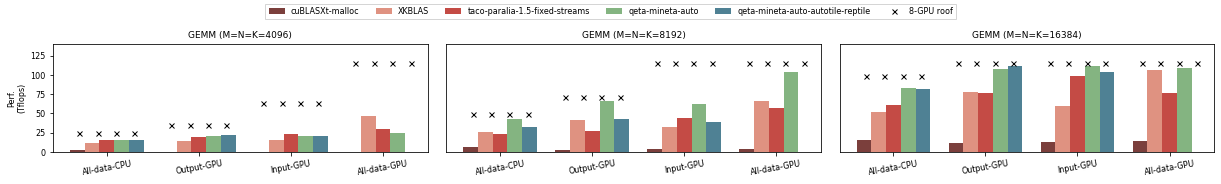

In [13]:
def select_motivation_data_16384(df):
    return df.loc[((df['M']*df['N']*df['K'] >= 15400**3) & (df['M']*df['N']*df['K'] <= 16384**3)) & 
                    (((df['Asloc'] == -1) & (df['Bsloc'] == -1) & (df['Csloc'] == -1)) |
                    ((df['Asloc'] == 4) & (df['Bsloc'] == 2) & (df['Csloc'] == -1))  | 
                     ((df['Asloc'] == -1) & (df['Bsloc'] == -1) & (df['Csloc'] == 0))  | 
                     ((df['Asloc'] == 4) & (df['Bsloc'] == 2) & (df['Csloc'] == 7)) )]
def select_motivation_data_8192(df):
    return df.loc[((df['M']*df['N']*df['K'] >= 8192**3) & (df['M']*df['N']*df['K'] <= 8192**3)) & 
                    (((df['Asloc'] == -1) & (df['Bsloc'] == -1) & (df['Csloc'] == -1)) |
                    ((df['Asloc'] == 4) & (df['Bsloc'] == 2) & (df['Csloc'] == -1))  | 
                     ((df['Asloc'] == -1) & (df['Bsloc'] == -1) & (df['Csloc'] == 0))  | 
                     ((df['Asloc'] == 4) & (df['Bsloc'] == 2) & (df['Csloc'] == 7)) )]

def select_motivation_data_4096(df):
    return df.loc[((df['M']*df['N']*df['K'] >= 4096**3) & (df['M']*df['N']*df['K'] <= 4096**3)) & 
                    (((df['Asloc'] == -1) & (df['Bsloc'] == -1) & (df['Csloc'] == -1)) |
                    ((df['Asloc'] == 4) & (df['Bsloc'] == 2) & (df['Csloc'] == -1))  | 
                     ((df['Asloc'] == -1) & (df['Bsloc'] == -1) & (df['Csloc'] == 0))  | 
                     ((df['Asloc'] == 4) & (df['Bsloc'] == 2) & (df['Csloc'] == 7)) )]

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

def throughput_select(thr1, thr2, loc):
    if loc == -1: return thr1
    else: return thr2

def gemm_tr_roof(M, N, K, Aloc, Bloc, Cloc, devices):
    #print("M = %d, N = %d, K = %d, Aloc = %d, Bloc =%d, Cloc = %d"%(M,N,K,Aloc,Bloc,Cloc))
    if machine == 'vulcan':
        perf = 7.2
        throughput  = 13
        channels = 4
        throughput_GPU = 24
        paral_cost = 0.1
    elif machine == 'karol':
        perf = 16
        throughput  = 10
        channels = 8
        throughput_GPU = 135
        paral_cost = 0.1
    else:
        print("Error: Unkown machine")
    exec_t = (1.0*M*N*K*2)/1e12/(perf*devices)
    thr_A = throughput_select(min(channels, devices)*throughput, (devices-1)*throughput_GPU, Aloc)
    thr_B = throughput_select(min(channels, devices)*throughput, (devices-1)*throughput_GPU, Bloc)
    thr_C = throughput_select(min(channels, devices)*throughput, (devices-1)*throughput_GPU, Cloc)
    transfer_t = 8*M*K/1e9/thr_A + 8*N*K/1e9/thr_B + 8*M*N/1e9/thr_C
    perf_roof = (M*N*K*2)/1e12/(max(exec_t, transfer_t))*(1-paral_cost)
    #print("M = %d, N = %d, K = %d, Aloc = %d, Bloc =%d, Cloc = %d => exec_t = %.3lf ms, transfer_t = %.3lf ms => Perf = %.2lf Tflops" %(M,N,K,Aloc,Bloc,Cloc,1e3*exec_t, 1e3*transfer_t,perf_roof))
    return perf_roof

dataset_motiv = dataset[(dataset['imp'] == 'cuBLASXt-malloc') |
                        (dataset['imp'] == 'XKBLAS') |
                        #(dataset['imp'] == 'taco-paralia-1.5-malloc') |
                        (dataset['imp'] == 'taco-paralia-1.5-fixed-streams') |
                        (dataset['imp'] == 'qeta-mineta-auto') |
                        (dataset['imp'] == 'qeta-mineta-auto-autotile-reptile')]
dataset_motiv['Asloc'][dataset_motiv['Asloc'] == -2] = -1
dataset_motiv['Bsloc'][dataset_motiv['Bsloc'] == -2] = -1
dataset_motiv['Csloc'][dataset_motiv['Csloc'] == -2] = -1
dataset_motiv['loc_str'] = 100*(dataset_motiv['Asloc']+1) + 10*(dataset_motiv['Bsloc']+1) + dataset_motiv['Csloc']+1

sns.set_palette(cp3_2)

plot_motiv = 2
if plot_motiv == 1: #Plot perf and PDP together
    
    dataset_part_4096 = select_motivation_data_4096(PARALiA_grouby_avg(dataset_motiv))
    dataset_part_8192 = select_motivation_data_8192(PARALiA_grouby_avg(dataset_motiv))
    dataset_part_16384 = select_motivation_data_16384(PARALiA_grouby_avg(dataset_motiv))
    
    dataset_plotlist = []
    dataset_plotlist.append(PARALiA_select_subset(dataset_part_4096,'square'))
    dataset_plotlist.append(PARALiA_select_subset(dataset_part_8192,'square'))
    dataset_plotlist.append(PARALiA_select_subset(dataset_part_16384,'square'))    
    #dataset_plotlist.append(PARALiA_select_subset(dataset_part_mean,'fat-thin'))
    #dataset_plotlist.append(PARALiA_select_subset(dataset_part_mean,'thin-fat'))
    elem_name=['GEMM (M=N=K=4096)', 'GEMM (M=N=K=8192)', 'GEMM (M=N=K=16384)']
    fig, ax = plt.subplots(2,3)
    for ctr in range(0,len(ax[0])):
        #dataset_plotlist[ctr].loc[dataset_plotlist[ctr]['imp'] == '13.PARALia_2-nosbo PRED-EDP', 'imp'] = '7.PARALiA-2-nosbo'
        dataset_plotlist[ctr].sort_values(inplace = True, ignore_index = True, by = ['plot_order','loc_str'])
        dataset_plotlist[ctr]['Tflops'] = dataset_plotlist[ctr]['perf']/1024
        #print(dataset_plotlist[ctr][dataset_plotlist[ctr]['imp'] == '3.PARALia_1.5 AllDev'])
        #dataset_plotlist[ctr] = dataset_plotlist[ctr][dataset_plotlist[ctr]['imp'] != '3.PARALiA']
        sns.barplot(data=dataset_plotlist[ctr], x = 'loc_str', y = 'Tflops', hue = 'imp', ax=ax[0][ctr])

        perf_pred = [gemm_tr_roof(int(dataset_plotlist[ctr].head(1)['M']),int(dataset_plotlist[ctr].head(1)['N']),int(dataset_plotlist[ctr].head(1)['K']), -1,-1,-1, 8),
                     gemm_tr_roof(int(dataset_plotlist[ctr].head(1)['M']),int(dataset_plotlist[ctr].head(1)['N']),int(dataset_plotlist[ctr].head(1)['K']), -1,-1,0, 8),
                     gemm_tr_roof(int(dataset_plotlist[ctr].head(1)['M']),int(dataset_plotlist[ctr].head(1)['N']),int(dataset_plotlist[ctr].head(1)['K']), 0,0,-1, 8),
                     gemm_tr_roof(int(dataset_plotlist[ctr].head(1)['M']),int(dataset_plotlist[ctr].head(1)['N']),int(dataset_plotlist[ctr].head(1)['K']), 0, 0, 0, 8)]
        ax[0][ctr].plot(list(map(lambda x: x - 0.3, [0,0.2,0.4,0.6,1,1.2,1.4,1.6,2,2.2,2.4,2.6,3,3.2,3.4,3.6])), [perf_pred[0], perf_pred[0], perf_pred[0], perf_pred[0], 
                                                                      perf_pred[1], perf_pred[1], perf_pred[1], perf_pred[1], 
                                                                      perf_pred[2], perf_pred[2], perf_pred[2], perf_pred[2], 
                                                                      perf_pred[3], perf_pred[3], perf_pred[3], perf_pred[3]], 'x', color = 'k', markersize = 5, label = "8-GPU roof")
        perf_pred_half = [gemm_tr_roof(int(dataset_plotlist[ctr].head(1)['M']),int(dataset_plotlist[ctr].head(1)['N']),int(dataset_plotlist[ctr].head(1)['K']), -1,-1,-1, 4),
                     gemm_tr_roof(int(dataset_plotlist[ctr].head(1)['M']),int(dataset_plotlist[ctr].head(1)['N']),int(dataset_plotlist[ctr].head(1)['K']), -1,-1,0, 4),
                     gemm_tr_roof(int(dataset_plotlist[ctr].head(1)['M']),int(dataset_plotlist[ctr].head(1)['N']),int(dataset_plotlist[ctr].head(1)['K']), 0,0,-1, 4),
                     gemm_tr_roof(int(dataset_plotlist[ctr].head(1)['M']),int(dataset_plotlist[ctr].head(1)['N']),int(dataset_plotlist[ctr].head(1)['K']), 0, 0, 0, 4)]
        ax[0][ctr].plot(list(map(lambda x: x - 0.3, [0,0.2,0.4,0.6,1,1.2,1.4,1.6,2,2.2,2.4,2.6,3,3.2,3.4,3.6])), [perf_pred_half[0], perf_pred_half[0], perf_pred_half[0], perf_pred_half[0], 
                                                                      perf_pred_half[1], perf_pred_half[1], perf_pred_half[1], perf_pred_half[1], 
                                                                      perf_pred_half[2], perf_pred_half[2], perf_pred_half[2], perf_pred_half[2], 
                                                                      perf_pred_half[3], perf_pred_half[3], perf_pred_half[3], perf_pred_half[3]], '+', color = cp3_2[4], markersize = 5, label = "4-GPU roof")
        change_width(ax[0][ctr], .16)
        ax[0][ctr].set_ylim([0,140])
        ax[0][ctr].set_title(elem_name[ctr], size = font+1)
        ax[0][ctr].get_legend().remove()
        if(ctr>0): 
            ax[0][ctr].set_yticks([])
            ax[0][ctr].set_ylabel('')
        ax[0][ctr].set_xlabel('')
        ax[0][ctr].set_xticks([])
        ax[0][ctr].set_xticklabels([])
        #ax[0][ctr].set_xticklabels(['All-data-CPU', 'Output-GPU', 'Input-GPU','All-data-GPU'], rotation = 25)
        if ctr == 0: 
            fig.legend(loc = 'upper center',#title="Model",  # Title for the legend
                fontsize=font, fancybox = False, ncol=6)
    #fig.savefig('Plots/MaxDev/Plot_testbed-%s_motivation-perf.pdf' % (machine))

    #fig, ax = plt.subplots(2,4)
    #fig.set_size_inches(width*9/4, height)
    for ctr in range(0,len(ax[1])):
        dataset_plotlist[ctr]['PDP(Gflops/W)'] = dataset_plotlist[ctr]['flops']/(1e9*dataset_plotlist[ctr]['energy'])
        dataset_plotlist[ctr]['PDP_pred'] = dataset_plotlist[ctr]['flops']/(1e9*dataset_plotlist[ctr]['pred_J'])   
        #dataset_plotlist[ctr].sort_values(inplace = True, ignore_index = True, by = ['loc_str'])
        sns.barplot(data=dataset_plotlist[ctr], x = 'loc_str', y = 'PDP(Gflops/W)', hue = 'imp', ax=ax[1][ctr], linewidth = 1)
        #print(dataset_plotlist[ctr][dataset_plotlist[ctr]['imp'] == '3.PARALia_1.5 AllDev'])
        perf_pred = [gemm_tr_roof(int(dataset_plotlist[ctr].head(1)['M']),int(dataset_plotlist[ctr].head(1)['N']),int(dataset_plotlist[ctr].head(1)['K']), -1,-1,-1, 8)*1e3/(dev_W_avg*8),
                     gemm_tr_roof(int(dataset_plotlist[ctr].head(1)['M']),int(dataset_plotlist[ctr].head(1)['N']),int(dataset_plotlist[ctr].head(1)['K']), -1,-1,0, 8)*1e3/(dev_W_avg*8),
                     gemm_tr_roof(int(dataset_plotlist[ctr].head(1)['M']),int(dataset_plotlist[ctr].head(1)['N']),int(dataset_plotlist[ctr].head(1)['K']), 0,0,-1, 8)*1e3/(dev_W_avg*8),
                     gemm_tr_roof(int(dataset_plotlist[ctr].head(1)['M']),int(dataset_plotlist[ctr].head(1)['N']),int(dataset_plotlist[ctr].head(1)['K']), 0, 0, 0, 8)*1e3/(dev_W_avg*8)]
        ax[1][ctr].plot(list(map(lambda x: x - 0.3, [0,0.2,0.4,0.6,1,1.2,1.4,1.6,2,2.2,2.4,2.6,3,3.2,3.4,3.6])), [perf_pred[0], perf_pred[0], perf_pred[0], perf_pred[0], 
                                                                      perf_pred[1], perf_pred[1], perf_pred[1], perf_pred[1], 
                                                                      perf_pred[2], perf_pred[2], perf_pred[2], perf_pred[2], 
                                                                      perf_pred[3], perf_pred[3], perf_pred[3], perf_pred[3]], 'x', color = 'k', markersize = 5)
        perf_pred_half = [gemm_tr_roof(int(dataset_plotlist[ctr].head(1)['M']),int(dataset_plotlist[ctr].head(1)['N']),int(dataset_plotlist[ctr].head(1)['K']), -1,-1,-1, 4)*1e3/(dev_W_avg*4),
                     gemm_tr_roof(int(dataset_plotlist[ctr].head(1)['M']),int(dataset_plotlist[ctr].head(1)['N']),int(dataset_plotlist[ctr].head(1)['K']), -1,-1,0, 4)*1e3/(dev_W_avg*4),
                     gemm_tr_roof(int(dataset_plotlist[ctr].head(1)['M']),int(dataset_plotlist[ctr].head(1)['N']),int(dataset_plotlist[ctr].head(1)['K']), 0,0,-1, 4)*1e3/(dev_W_avg*4),
                     gemm_tr_roof(int(dataset_plotlist[ctr].head(1)['M']),int(dataset_plotlist[ctr].head(1)['N']),int(dataset_plotlist[ctr].head(1)['K']), 0, 0, 0, 4)*1e3/(dev_W_avg*4)]
        ax[1][ctr].plot(list(map(lambda x: x - 0.3, [0,0.2,0.4,0.6,1,1.2,1.4,1.6,2,2.2,2.4,2.6,3,3.2,3.4,3.6])), [perf_pred_half[0], perf_pred_half[0], perf_pred_half[0], perf_pred_half[0], 
                                                                      perf_pred_half[1], perf_pred_half[1], perf_pred_half[1], perf_pred_half[1], 
                                                                      perf_pred_half[2], perf_pred_half[2], perf_pred_half[2], perf_pred_half[2], 
                                                                      perf_pred_half[3], perf_pred_half[3], perf_pred_half[3], perf_pred_half[3]], '+', color = cp3_2[4], markersize = 5)
        
        change_width(ax[1][ctr], .16)
        ax[1][ctr].set_ylim([0,100])
        ax[1][ctr].set_title('')
        ax[1][ctr].get_legend().remove()
        ax[1][ctr].set_xticks(np.arange(4))
        if(ctr>0): 
            ax[1][ctr].set_yticks([])
            ax[1][ctr].set_ylabel('')
        else:
            ax[0][ctr].set_ylabel('Perf.\n(Tflops)')
            ax[1][ctr].set_ylabel('Energy eff.\n(Gflops/W)')
        ax[1][ctr].set_xlabel('')
        #ax[1][ctr].set_xticklabels(['4096_loc=AllCPU', '8192_loc=AllCPU', '4096_loc=C-GPU', '8192_loc=C-GPU', '4096_loc=A,B-GPU', '8192_loc=A,B-GPU', '4096_loc=AllGPU', '8192_loc=AllGPU', ''], rotation = 25)
        ax[1][ctr].set_xticklabels(['All-data-CPU', 'Output-GPU', 'Input-GPU','All-data-GPU'], rotation = 10)
    fig.set_size_inches(width*10/4, height*2)
    fig.subplots_adjust(left=0.065, bottom=0.1, right=0.99, top=0.88, wspace=0.05, hspace=0.05)
    #fig.savefig('./PlotsPlot_testbed-%s_motivation-full.pdf' % (machine))
    fig.savefig('./Plots/Plot_testbed-%s_motivation-imp.png' % (machine), dpi = 1200)
elif plot_motiv == 2: #Plot perf only
    #sns.set_palette(cp7)

    dataset_part_4096 = select_motivation_data_4096(PARALiA_grouby_avg(dataset_motiv))
    dataset_part_8192 = select_motivation_data_8192(PARALiA_grouby_avg(dataset_motiv))
    dataset_part_16384 = select_motivation_data_16384(PARALiA_grouby_avg(dataset_motiv))
    
    dataset_plotlist = []
    dataset_plotlist.append(PARALiA_select_subset(dataset_part_4096,'square'))
    dataset_plotlist.append(PARALiA_select_subset(dataset_part_8192,'square'))
    dataset_plotlist.append(PARALiA_select_subset(dataset_part_16384,'square'))
    elem_name=['GEMM (M=N=K=4096)', 'GEMM (M=N=K=8192)', 'GEMM (M=N=K=16384)']
    fig, ax = plt.subplots(1,3)
    for ctr in range(0,3):
        #dataset_plotlist[ctr].loc[dataset_plotlist[ctr]['imp'] == '5.PARALia_1.5 PRED-EDP', 'imp'] = '3.PARALiA'
        dataset_plotlist[ctr].sort_values(inplace = True, ignore_index = True, by = ['plot_order','loc_str'])
        #print(dataset_plotlist[ctr])
        dataset_plotlist[ctr]['Tflops'] = dataset_plotlist[ctr]['perf']/1024
        #print(dataset_plotlist[ctr][dataset_plotlist[ctr]['imp'] == '3.PARALia_1.5 AllDev'])
        #dataset_plotlist[ctr] = dataset_plotlist[ctr][dataset_plotlist[ctr]['imp'] != '3.PARALiA']
        sns.barplot(data=dataset_plotlist[ctr], x = 'loc_str', y = 'Tflops', hue = 'imp', ax=ax[ctr])#, palette = cp7)

        perf_pred = [gemm_tr_roof(int(dataset_plotlist[ctr].head(1)['M']),int(dataset_plotlist[ctr].head(1)['N']),int(dataset_plotlist[ctr].head(1)['K']), -1,-1,-1, 8),
                     gemm_tr_roof(int(dataset_plotlist[ctr].head(1)['M']),int(dataset_plotlist[ctr].head(1)['N']),int(dataset_plotlist[ctr].head(1)['K']), -1,-1,0, 8),
                     gemm_tr_roof(int(dataset_plotlist[ctr].head(1)['M']),int(dataset_plotlist[ctr].head(1)['N']),int(dataset_plotlist[ctr].head(1)['K']), 0,0,-1, 8),
                     gemm_tr_roof(int(dataset_plotlist[ctr].head(1)['M']),int(dataset_plotlist[ctr].head(1)['N']),int(dataset_plotlist[ctr].head(1)['K']), 0, 0, 0, 8)]
        ax[ctr].plot(list(map(lambda x: x - 0.3, [0,0.2,0.4,0.6,1,1.2,1.4,1.6,2,2.2,2.4,2.6,3,3.2,3.4,3.6])), [perf_pred[0], perf_pred[0], perf_pred[0], perf_pred[0], 
                                                                      perf_pred[1], perf_pred[1], perf_pred[1], perf_pred[1], 
                                                                      perf_pred[2], perf_pred[2], perf_pred[2], perf_pred[2], 
                                                                      perf_pred[3], perf_pred[3], perf_pred[3], perf_pred[3]], 'x', color = 'k', markersize = 5, label = "8-GPU roof")
        perf_pred_half = [gemm_tr_roof(int(dataset_plotlist[ctr].head(1)['M']),int(dataset_plotlist[ctr].head(1)['N']),int(dataset_plotlist[ctr].head(1)['K']), -1,-1,-1, 4),
                     gemm_tr_roof(int(dataset_plotlist[ctr].head(1)['M']),int(dataset_plotlist[ctr].head(1)['N']),int(dataset_plotlist[ctr].head(1)['K']), -1,-1,0, 4),
                     gemm_tr_roof(int(dataset_plotlist[ctr].head(1)['M']),int(dataset_plotlist[ctr].head(1)['N']),int(dataset_plotlist[ctr].head(1)['K']), 0,0,-1, 4),
                     gemm_tr_roof(int(dataset_plotlist[ctr].head(1)['M']),int(dataset_plotlist[ctr].head(1)['N']),int(dataset_plotlist[ctr].head(1)['K']), 0, 0, 0, 4)]
        #ax[ctr].plot(list(map(lambda x: x - 0.3, [0,0.2,0.4,0.6,1,1.2,1.4,1.6,2,2.2,2.4,2.6,3,3.2,3.4,3.6])), [perf_pred_half[0], perf_pred_half[0], perf_pred_half[0], perf_pred_half[0], 
        #                                                              perf_pred_half[1], perf_pred_half[1], perf_pred_half[1], perf_pred_half[1], 
        #                                                              perf_pred_half[2], perf_pred_half[2], perf_pred_half[2], perf_pred_half[2], 
        #                                                              perf_pred_half[3], perf_pred_half[3], perf_pred_half[3], perf_pred_half[3]], '+', color = cp3_2[4], markersize = 5, label = "4-GPU roof")
        change_width(ax[ctr], .16)
        ax[ctr].set_ylim([0,140])
        ax[ctr].set_title(elem_name[ctr], size = font+1)
        ax[ctr].get_legend().remove()
        if(ctr>0): 
            ax[ctr].set_yticks([])
            ax[ctr].set_ylabel('')
        else:
            ax[ctr].set_ylabel('Perf.\n(Tflops)')
        if ctr == 0: 
            fig.legend(loc = 'upper center',#title="Model",  # Title for the legend
                fontsize=font, fancybox = False, ncol=6)
        ax[ctr].set_xticks(np.arange(4))
        ax[ctr].set_xlabel('')
        #ax[ctr].set_xticklabels(['4096_loc=AllCPU', '8192_loc=AllCPU', '4096_loc=C-GPU', '8192_loc=C-GPU', '4096_loc=A,B-GPU', '8192_loc=A,B-GPU', '4096_loc=AllGPU', '8192_loc=AllGPU', ''], rotation = 25)
        ax[ctr].set_xticklabels(['All-data-CPU','Output-GPU','Input-GPU','All-data-GPU'], rotation = 10)
    #fig.set_size_inches(width*10/4, height*1.2)
    fig.set_size_inches(width*20/4, height*1.2)
    fig.subplots_adjust(left=0.065, bottom=0.2, right=0.99, top=0.78, wspace=0.05, hspace=0.05)
    fig.savefig('./Plots/Plot_testbed-%s_motivation-perf.png' % (machine), dpi = 1200)

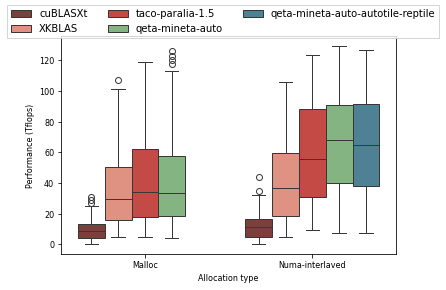

In [17]:
def enforce_dataset_limits_alloc(df):
    return df[
    #(df['M']*df['N']*df['K'] >=  4096**3) &
    #(df['M'] == df['N']) & (df['K'] == df['M']) &
    (((df['Csloc'] == -1)) |
    ((df['Csloc'] == -2)))]#248**3)) ]

sns.set_palette(cp3_2)
#sns.color_palette()
dataset_alloc_comparisson = dataset[(dataset['imp'] == 'cuBLASXt') |
                        (dataset['imp'] == 'cuBLASXt-malloc') |
                        (dataset['imp'] == 'XKBLAS-malloc') |
                        (dataset['imp'] == 'XKBLAS') |
                        #(dataset['imp'] == 'taco-paralia-1.5') |
                        (dataset['imp'] == 'taco-paralia-1.5-fixed-streams') |
                        (dataset['imp'] == 'taco-paralia-1.5-malloc') |
                        (dataset['imp'] == 'qeta-mineta-auto') |
                        (dataset['imp'] == 'qeta-mineta-auto-malloc') |
                        (dataset['imp'] == 'qeta-mineta-auto-autotile-reptile')]
dataset_alloc_comparisson['imp'][dataset_alloc_comparisson['imp'] == 'cuBLASXt-malloc'] = 'cuBLASXt'
dataset_alloc_comparisson['imp'][dataset_alloc_comparisson['imp'] == 'XKBLAS-malloc'] = 'XKBLAS'
dataset_alloc_comparisson['imp'][dataset_alloc_comparisson['imp'] == 'taco-paralia-1.5-fixed-streams'] = 'taco-paralia-1.5'
dataset_alloc_comparisson['imp'][dataset_alloc_comparisson['imp'] == 'taco-paralia-1.5-malloc'] = 'taco-paralia-1.5'
dataset_alloc_comparisson['imp'][dataset_alloc_comparisson['imp'] == 'qeta-mineta-auto-malloc'] = 'qeta-mineta-auto'
#dataset_alloc_comparisson['imp'][dataset_alloc_comparisson['imp'] == 'qeta-mineta-auto-autotile-malloc'] = 'qeta-mineta-auto-autotile'
dataset_alloc_comparisson['imp'][dataset_alloc_comparisson['imp'] == 'qeta-mineta-auto-autotile-malloc'] = 'qeta-mineta-auto-autotile'

dataset_part_mean = enforce_dataset_limits_alloc(PARALiA_grouby_avg(dataset_alloc_comparisson))

dataset_part_mean['Performance (Tflops)'] = dataset_part_mean['perf']/1024
dataset_part_mean['alloc_type'] = 'Numa-interlaved'
dataset_part_mean['alloc_type'][(dataset_part_mean['loc_str'] < 0) | (dataset_part_mean['loc_str'] == 529)] = 'Malloc'
dataset_part_mean.sort_values(inplace = True, by = ['plot_order', 'alloc_type'])
fig, ax = plt.subplots(1)
sns.boxplot(data=dataset_part_mean, x = 'alloc_type', y = 'Performance (Tflops)', hue = 'imp', ax=ax)
#ax.set_xticklabels(['Malloc', 'Numa-Interlaved'])
ax.set_xlabel('Allocation type')
ax.get_legend().remove()
fig.legend(loc = 'upper center',#title="Model",  # Title for the legend
            fontsize=font+2, fancybox = False, ncol=3)
fig.savefig('Plots/Plot_testbed-%s_alloc_gflops.png' % (machine))

/tmp/ipykernel_8169/1759687671.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['All-data-CPU(h,h,h)', 'Output-GPU(h,h,0)', 'Mixed-GPUs(4,2,7)'], rotation = 15) #'All-data-GPU(0,1,2)','All-data-GPU(0,3,6)',


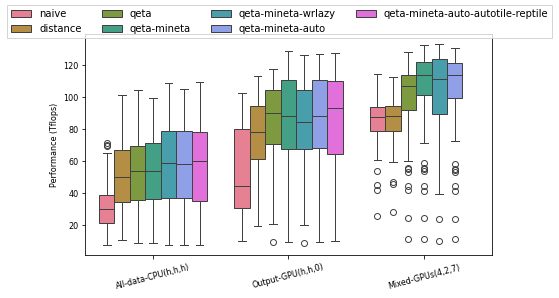

In [19]:
def enforce_dataset_limits_imp(df):
    return df[
    #[#((df['M']*df['N']*df['K'] >=  4096**3)) & ((df['M'] >= 1024)) & ((df['N'] >= 1024)) & ((df['K'] >= 1024)) & 
    #(df['M'] == df['N']) & (df['K'] == df['M']) &
    ((df['Asloc'] == -1) |
    ((df['Asloc'] == 4) & (df['Bsloc'] == 2) & (df['Csloc'] == 7))) ]

sns.set_palette("crest")
#sns.color_palette()

dataset_imp_comparisson = dataset[(dataset['imp'] == 'naive') |
                        (dataset['imp'] == 'distance') |
                        (dataset['imp'] == 'qeta') |
                        #(dataset['imp'] == 'taco-paralia-1.5-malloc') |
                        (dataset['imp'] == 'qeta-mineta') |
                        (dataset['imp'] == 'qeta-mineta-wrlazy') |
                        (dataset['imp'] == 'qeta-mineta-auto')|
                        (dataset['imp'] == 'qeta-mineta-auto-autotile-reptile')]

dataset_part_mean = enforce_dataset_limits_imp(PARALiA_grouby_avg(dataset_imp_comparisson))
dataset_part_mean['Performance (Tflops)'] = dataset_part_mean['perf']/1024
dataset_part_mean.sort_values(inplace = True, by = ['plot_order', 'loc_str'])
fig, ax = plt.subplots(1)
sns.boxplot(data=dataset_part_mean, x = 'loc_str', y = 'Performance (Tflops)', hue = 'imp', ax=ax)
ax.set_xticklabels(['All-data-CPU(h,h,h)', 'Output-GPU(h,h,0)', 'Mixed-GPUs(4,2,7)'], rotation = 15) #'All-data-GPU(0,1,2)','All-data-GPU(0,3,6)',
ax.set_xlabel('')
ax.get_legend().remove()
fig.legend(loc = 'upper center',#title="Model",  # Title for the legend
            fontsize=font+2, fancybox = False, ncol=4)
#fig.set_size_inches(width*20/4, height*4)
fig.subplots_adjust(left=.05, bottom=.12, right=.99, top=.89, wspace=0.02, hspace=0.34)        
#fig.savefig('Plots/Plot_testbed-%s_gflops_sumup.pdf' % (machine))
fig.savefig('Plots/Plot_testbed-%s_gflops_implementations.png' % (machine))

/tmp/ipykernel_8169/2998469950.py:44: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax[ctr][0].set_xticks([])
/tmp/ipykernel_8169/2998469950.py:63: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax[ctr][1].set_xticks([])
/tmp/ipykernel_8169/2998469950.py:44: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax[ctr][0].set_xticks([])
/tmp/ipykernel_8169/2998469950.py:63: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units inste

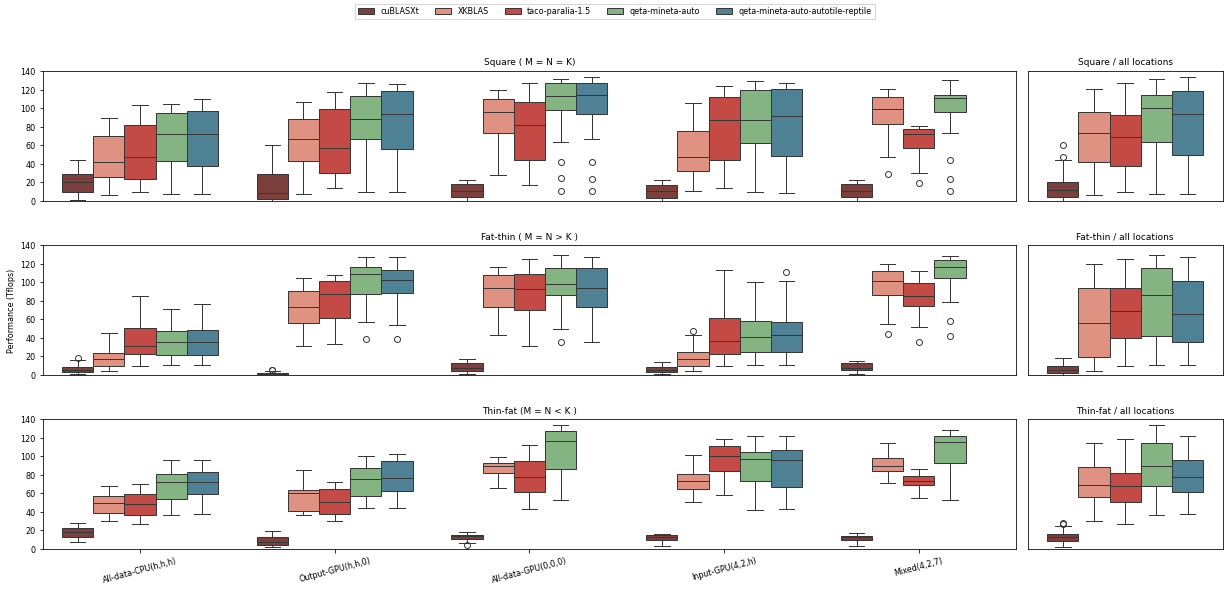

In [20]:
def enforce_dataset_limits(df):
    return df#.loc[#((df['M']*df['N']*df['K'] >=  4096**3)) & ((df['M'] >= 1024)) & ((df['N'] >= 1024)) & ((df['K'] >= 1024)) & 
    #(df['M']*df['N']*df['K'] <(19457**3))]#248**3)) ] #

sns.set_palette(cp3_2)
#sns.color_palette()

dataset_perf_comparisson = dataset[(dataset['imp'] == 'cuBLASXt') |
                        (dataset['imp'] == 'XKBLAS') |
                        #(dataset['imp'] == 'taco-paralia-1.5-malloc') |
                        (dataset['imp'] == 'taco-paralia-1.5-fixed-streams') |
                        (dataset['imp'] == 'qeta-mineta-auto') |
                        (dataset['imp'] == 'qeta-mineta-auto-autotile-reptile')]
dataset_perf_comparisson['Asloc'][dataset_perf_comparisson['Asloc'] == -2] = -1
dataset_perf_comparisson['Bsloc'][dataset_perf_comparisson['Bsloc'] == -2] = -1
dataset_perf_comparisson['Csloc'][dataset_perf_comparisson['Csloc'] == -2] = -1
dataset_perf_comparisson['loc_str'] = 100*(dataset_perf_comparisson['Asloc']+1) + 10*(dataset_perf_comparisson['Bsloc']+1) + dataset_perf_comparisson['Csloc']+1
dataset_perf_comparisson['imp'][dataset_perf_comparisson['imp'] == 'taco-paralia-1.5-fixed-streams'] = 'taco-paralia-1.5'

dataset_part_mean = enforce_dataset_limits(PARALiA_grouby_avg(dataset_perf_comparisson))
dataset_part_mean['PDP (Gflops/W)'] = dataset_part_mean['flops']/(1e9*dataset_part_mean['energy'])
dataset_part_mean['Performance (Tflops)'] = dataset_part_mean['perf']/1024

#print(dataset_part_mean.head(5))
dataset_plotlist = []
dataset_plotlist.append(PARALiA_select_subset(dataset_part_mean,'square'))
dataset_plotlist.append(PARALiA_select_subset(dataset_part_mean,'fat-thin'))
dataset_plotlist.append(PARALiA_select_subset(dataset_part_mean,'thin-fat'))
#dataset_plotlist.append(dataset_part_mean)

elem_name=['Square ( M = N = K)', 'Fat-thin ( M = N > K )', 'Thin-fat (M = N < K )']
fig, ax = plt.subplots(len(dataset_plotlist),2, gridspec_kw={'width_ratios': [5, 1]})
for ctr in range(0,len(dataset_plotlist)):
    #if ctr == 1:
    #    continue
    #dataset_plotlist[ctr].loc[dataset_plotlist[ctr]['imp'] == '3.PARALia_1.5 AllDev', 'imp'] = '3.PARALia simple'
    dataset_plotlist[ctr].sort_values(inplace = True, by = ['plot_order', 'loc_str'])
    sns.boxplot(data=dataset_plotlist[ctr], x = 'loc_str', y = 'Performance (Tflops)', hue = 'imp', ax=ax[ctr][0])
    if (ctr < 3):
        ax[ctr][0].set_title(elem_name[ctr], size = font+1)   
    else:
        ax[ctr][0].set_title('All data shapes', size = font+1)    
    if(ctr!=len(dataset_plotlist)-1): 
        ax[ctr][0].set_xticks([])
        ax[ctr][0].set_xlabel('')
    else:
        #ax[ctr][0].set_xticklabels(['[-1,-1,-1]', '[0,0,-1]', '[4,2,-1]', '[-1,-1,0]', '[-1,0,5]', '[0,0,0]', '[0,1,2]', '[0,3,6]', '[4,2,5]', '[1,6,7]'])
        ax[ctr][0].set_xticklabels(['All-data-CPU(h,h,h)', 'Output-GPU(h,h,0)', 'All-data-GPU(0,0,0)', 'Input-GPU(4,2,h)', 'Mixed(4,2,7)'], rotation = 15) #'All-data-GPU(0,1,2)','All-data-GPU(0,3,6)',
    if(ctr!=1):     
        ax[ctr][0].set_ylabel('')
    ax[ctr][0].get_legend().remove()
    if ctr == 0:     
        fig.legend(loc = 'upper center',#title="Model",  # Title for the legend
            fontsize=font, fancybox = False, ncol=10)
    ax[ctr][0].set_ylim([0,140])
    ax[ctr][1].set_ylim([0,140])
    #ax[ctr].set_yscale('log')
    #ax[ctr].set_ylim([0.05,100])
    #ax[ctr].set_xticks([])
    ax[ctr][0].set_xlabel('')
    sns.boxplot(data=dataset_plotlist[ctr], hue = 'imp', y = 'Performance (Tflops)', ax=ax[ctr][1])
    ax[ctr][1].get_legend().remove()
    ax[ctr][1].set_xticks([])
    ax[ctr][1].set_yticks([])
    ax[ctr][1].set_yticklabels('')
    ax[ctr][1].set_ylabel('') 
    ax[ctr][1].set_xlabel('')
    if (ctr == 0):
        ax[ctr][1].set_title('Square / all locations', size = font+1)
    if (ctr == 1):
        ax[ctr][1].set_title('Fat-thin / all locations', size = font+1)   
    if (ctr == 2):
        ax[ctr][1].set_title('Thin-fat / all locations', size = font+1)    
    elif (ctr == 3):
        ax[ctr][1].set_title('Total Dataset', size = font+1)
fig.set_size_inches(width*20/4, height*4)
fig.subplots_adjust(left=.05, bottom=.12, right=.99, top=.89, wspace=0.02, hspace=0.34)        
#fig.savefig('Plots/Plot_testbed-%s_gflops_sumup.pdf' % (machine))
fig.savefig('Plots/Plot_testbed-%s_gflops_sumup.png' % (machine))
if False:
    fig1, ax1 = plt.subplots(len(dataset_plotlist),2, gridspec_kw={'width_ratios': [5, 1]})
    for ctr in range(0,len(dataset_plotlist)):
        sns.boxplot(data=dataset_plotlist[ctr], x = 'loc_str', y = 'PDP (Gflops/W)', hue = 'imp', ax=ax1[ctr][0])
        #ax1[ctr][0].set_yscale('log') 
        if (ctr < 3):
            ax1[ctr][0].set_title(elem_name[ctr], size = font+1)   
        else:
            ax1[ctr][0].set_title('All data shapes', size = font+1)    
        if(ctr!=len(dataset_plotlist)-1): 
            ax1[ctr][0].set_xticks([])
            ax1[ctr][0].set_xlabel('')
        else:
            #ax1[ctr][0].set_xticklabels(['[-1,-1,-1]', '[0,0,-1]', '[4,2,-1]', '[-1,-1,0]', '[-1,0,5]', '[0,0,0]', '[0,1,2]', '[0,3,6]', '[4,2,5]', '[1,6,7]'])
            ax1[ctr][0].set_xticklabels(['All-data-CPU(h,h,h)', 'Output-GPU(h,h,0)', 'All-data-GPU(0,0,0)', 'Input-GPU(4,2,h)', 'Mixed(4,2,7)'], rotation = 15) #'All-data-GPU(0,1,2)','All-data-GPU(0,3,6)',

        if(ctr!=1):     
            ax1[ctr][0].set_ylabel('')
        ax1[ctr][0].get_legend().remove()
        if ctr == 0:     
            fig1.legend(loc = 'upper center',#title="Model",  # Title for the legend
                fontsize=font, fancybox = False, ncol=10)
        #ax1[ctr][0].set_xlabel('')
        sns.boxplot(data=dataset_plotlist[ctr], hue = 'imp', y = 'PDP (Gflops/W)', ax=ax1[ctr][1])
        ax1[ctr][1].get_legend().remove()
        #ax1[ctr][1].set_yscale('log')
        ax1[ctr][1].set_yticks([])
        ax1[ctr][1].set_yticklabels('')
        ax1[ctr][1].minorticks_off()
        ax1[ctr][1].set_xticks([])
        ax1[ctr][1].set_ylabel('') 
        ax1[ctr][1].set_xlabel('')
        if (ctr == 0):
            ax1[ctr][1].set_title('Square / all locations', size = font+1)
        if (ctr == 1):
            ax1[ctr][1].set_title('Fat-thin / all locations', size = font+1)   
        if (ctr == 2):
            ax1[ctr][1].set_title('Thin-fat / all locations', size = font+1)    
        elif (ctr == 3):
            ax1[ctr][1].set_title('Total Dataset', size = font+1)
    fig1.set_size_inches(width*20/4, height*4)
    fig1.subplots_adjust(left=.065, bottom=.12, right=.99, top=.89, wspace=0.02, hspace=0.34)
    #fig1.savefig('Plots/Plot_testbed-%s_Energy_sumup.pdf' % (machine))   
    fig1.savefig('Plots/Plot_testbed-%s_Energy_sumup_imp.png' % (machine)) 